In [1]:
%run get_fixed_variables.ipynb

In [2]:
LWCF_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_8xco2_strato.npy')
LWCF_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_8xco2_nostrato.npy')

SWCF_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_8xco2_strato.npy')
SWCF_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_8xco2_nostrato.npy')

SWCF_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI_strato.npy')
SWCF_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_PI_nostrato.npy')

LWCF_1xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_PI_strato.npy')
LWCF_1xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_PI_nostrato.npy')

LWCF_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_8xco2_control.npy')
SWCF_8xco2= np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_8xco2_control.npy')
LWCF_piControl = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/LWCF_1xco2_control.npy')
SWCF_piControl = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/SWCF_1xco2_control.npy')



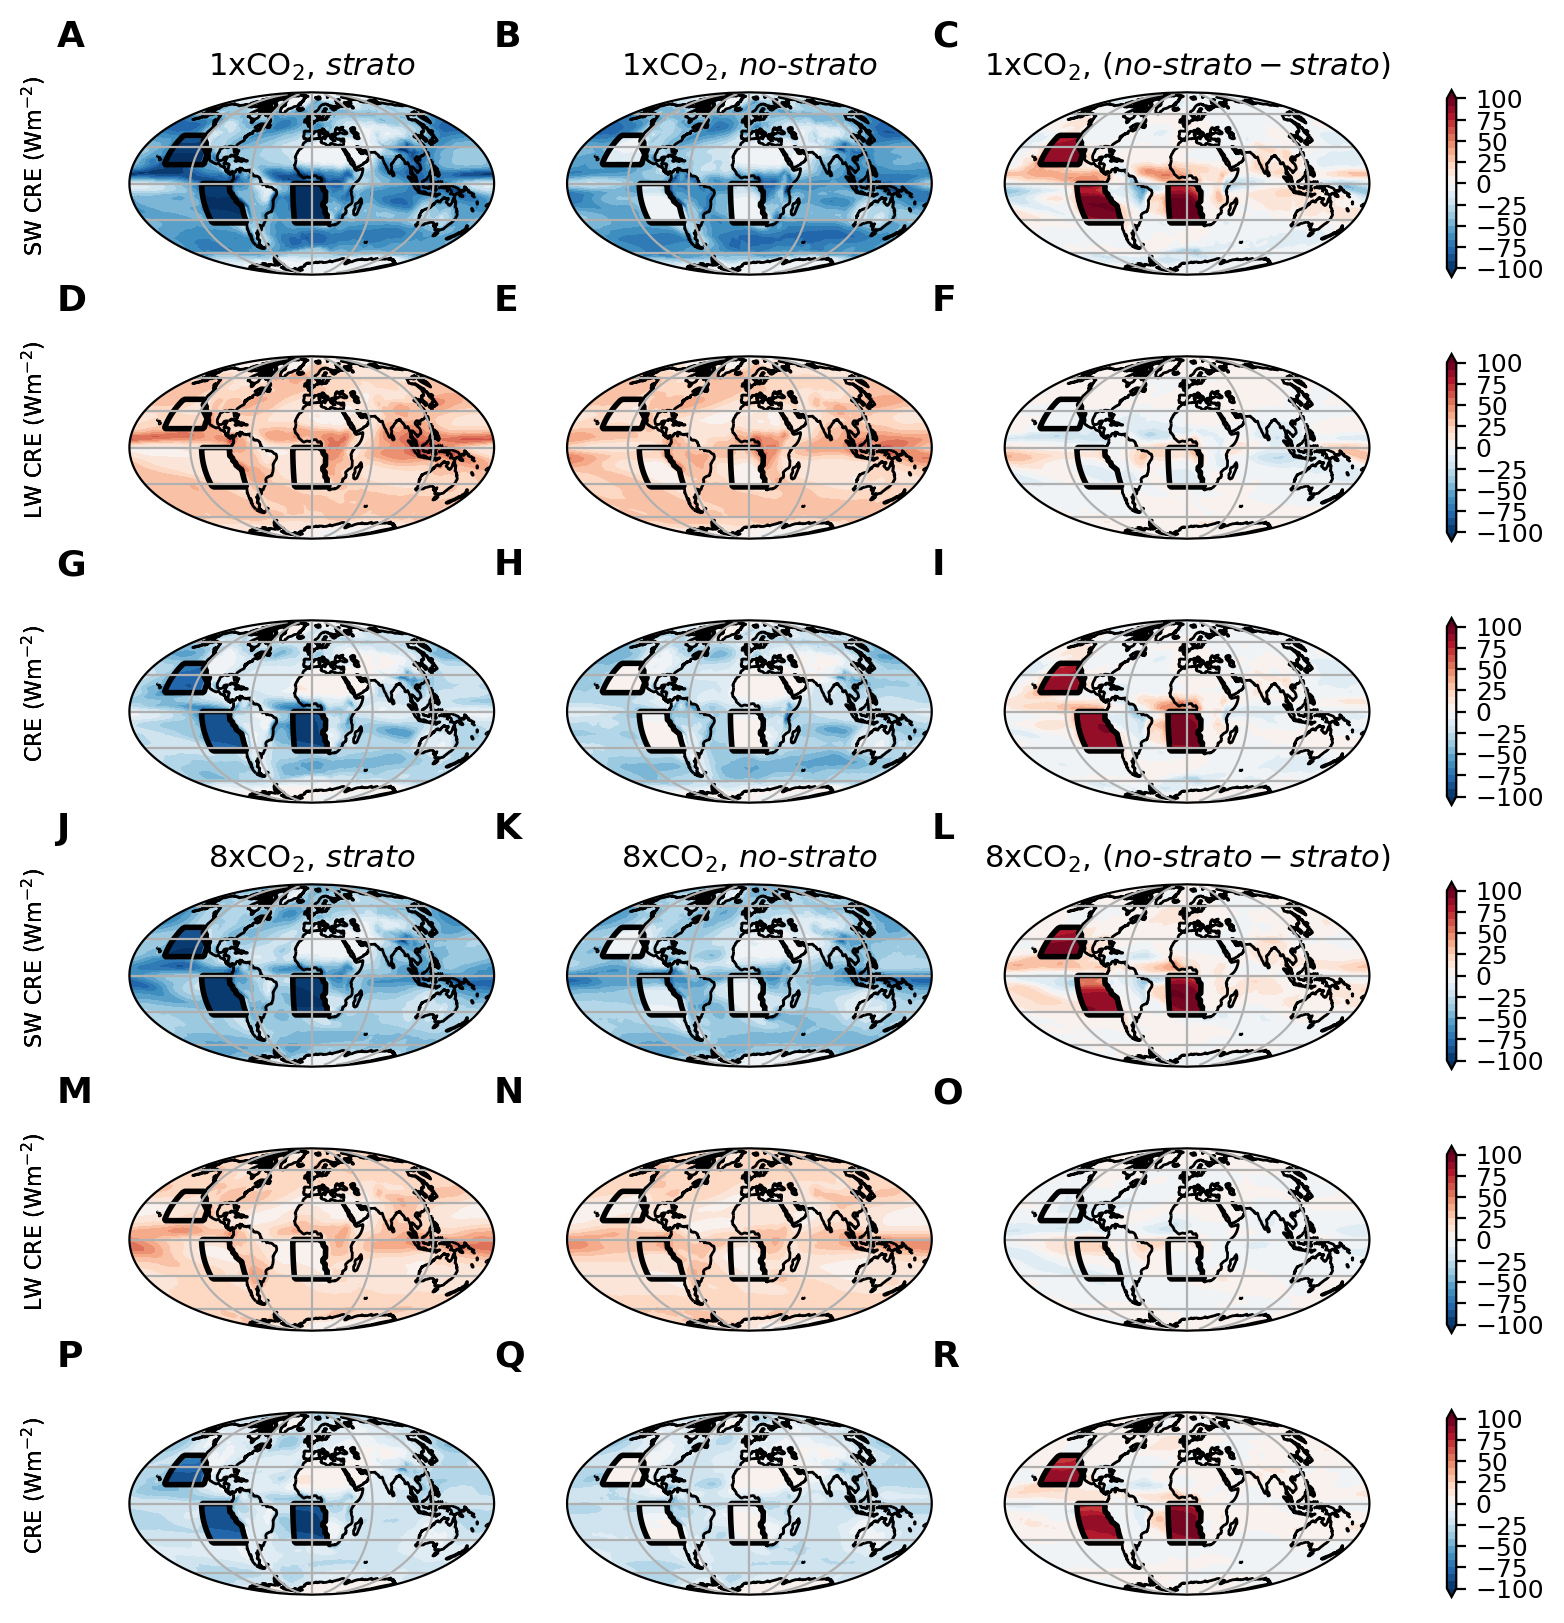

In [4]:
# Set up the figure and axes
fig, ax = plt.subplots(6, 3, figsize=(10, 10), dpi=200, subplot_kw={'projection': ccrs.Mollweide(central_longitude=0)})
shrink = 0.85
cmap = 'RdBu_r'
lev_cre = np.linspace(-100, 100, 25)
lev_cre_diff = np.linspace(-100, 100, 25)

# Calculate averages
CRE_1xco2_strato = np.average(LWCF_1xco2_strato[-120:], axis=0) + np.average(SWCF_1xco2_strato[-120:], axis=0)
CRE_1xco2_nostrato = np.average(LWCF_1xco2_nostrato[-120:], axis=0) + np.average(SWCF_1xco2_nostrato[-120:], axis=0)

# Add cyclic point for smoother contour plotting
strato_mask_new, lons = add_cyclic_point(strato_mask, coord=lon)
SWCF_1xco2_nostrato_new, lons = add_cyclic_point(np.average(SWCF_1xco2_nostrato[-120:], axis=0), coord=lon)
SWCF_1xco2_strato_new, lons = add_cyclic_point(np.average(SWCF_1xco2_strato[-120:], axis=0), coord=lon)
LWCF_1xco2_nostrato_new, lons = add_cyclic_point(np.average(LWCF_1xco2_nostrato[-120:], axis=0), coord=lon)
LWCF_1xco2_strato_new, lons = add_cyclic_point(np.average(LWCF_1xco2_strato[-120:], axis=0), coord=lon)
CRE_1xco2_nostrato_new, lons = add_cyclic_point(CRE_1xco2_nostrato, coord=lon)
CRE_1xco2_strato_new, lons = add_cyclic_point(CRE_1xco2_strato, coord=lon)


# Calculate averages
CRE_8xco2_strato = np.average(LWCF_8xco2_strato[-120:], axis=0) + np.average(SWCF_8xco2_strato[-120:], axis=0)
CRE_8xco2_nostrato = np.average(LWCF_8xco2_nostrato[-120:], axis=0) + np.average(SWCF_8xco2_nostrato[-120:], axis=0)

# Add cyclic point for smoother contour plotting
SWCF_8xco2_nostrato_new, lons = add_cyclic_point(np.average(SWCF_8xco2_nostrato[-120:], axis=0), coord=lon)
SWCF_8xco2_strato_new, lons = add_cyclic_point(np.average(SWCF_8xco2_strato[-120:], axis=0), coord=lon)
LWCF_8xco2_nostrato_new, lons = add_cyclic_point(np.average(LWCF_8xco2_nostrato[-120:], axis=0), coord=lon)
LWCF_8xco2_strato_new, lons = add_cyclic_point(np.average(LWCF_8xco2_strato[-120:], axis=0), coord=lon)
CRE_8xco2_nostrato_new, lons = add_cyclic_point(CRE_8xco2_nostrato, coord=lon)
CRE_8xco2_strato_new, lons = add_cyclic_point(CRE_8xco2_strato, coord=lon)

# Plotting each subplot
titles_1x = [
    '1xCO$_2$, $\it{strato}$', '1xCO$_2$, $\it{no}$-$\it{strato}$', '1xCO$_2$, ($\it{no}$-$\it{strato}-\it{strato}$)'
]

titles_8x = [
    '8xCO$_2$, $\it{strato}$', '8xCO$_2$, $\it{no}$-$\it{strato}$', '8xCO$_2$, ($\it{no}$-$\it{strato}-\it{strato}$)'
]

datasets = [
    SWCF_1xco2_strato_new, SWCF_1xco2_nostrato_new, SWCF_1xco2_nostrato_new-SWCF_1xco2_strato_new,
    LWCF_1xco2_strato_new, LWCF_1xco2_nostrato_new, LWCF_1xco2_nostrato_new-LWCF_1xco2_strato_new,
    CRE_1xco2_strato_new, CRE_1xco2_nostrato_new, CRE_1xco2_nostrato_new-CRE_1xco2_strato_new,
    SWCF_8xco2_strato_new, SWCF_8xco2_nostrato_new, SWCF_8xco2_nostrato_new-SWCF_8xco2_strato_new,
    LWCF_8xco2_strato_new, LWCF_8xco2_nostrato_new, LWCF_8xco2_nostrato_new-LWCF_8xco2_strato_new,
    CRE_8xco2_strato_new, CRE_8xco2_nostrato_new, CRE_8xco2_nostrato_new-CRE_8xco2_strato_new
]

levels = [lev_cre, lev_cre, lev_cre_diff,
         lev_cre, lev_cre, lev_cre_diff,
         lev_cre, lev_cre, lev_cre_diff]

labels = ['SW CRE (Wm$^{-2}$)',
         'LW CRE (Wm$^{-2}$)', 
         'CRE (Wm$^{-2}$)',
         'SW CRE (Wm$^{-2}$)',
         'LW CRE (Wm$^{-2}$)',
         'CRE (Wm$^{-2}$)']

# Loop through the subplots and plot the data
for i in range(6):
    for j in range(3):
        idx = i * 3 + j
        ax[i, j].coastlines(resolution='110m')
        ax[i, j].gridlines()
        c = ax[i, j].contourf(lons, lat, datasets[idx], levels=lev_cre, cmap=cmap, extend='both', transform=ccrs.PlateCarree())
        ax[0, j].set_title(titles_1x[j], fontsize=11)
        ax[3, j].set_title(titles_8x[j], fontsize=11)
        if idx%3 == 0:
            cbar = plt.colorbar(c, shrink=shrink, ax=ax[i,:])
            cbar.ax.tick_params(labelsize=9) 
        ax[i,0].annotate(labels[i], xy=(-0.3,0.6),xycoords="axes fraction", fontsize=8, verticalalignment='center',rotation = 'vertical')
        

        c = ax[i,j].contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
        #ax[i,j].annotate(str(np.round(strato_avg(datasets[idx][:,:-1]),1)) + ' Wm$^{-2}$', xy=(0.8, 0), xycoords="axes fraction", fontstyle='italic',fontsize=7) 

# Annotating each subplot
annotations = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R"]
for i in range(6):
    for j in range(3):
        ax[i, j].annotate(annotations[i * 3 + j], xy=(-0.2, 1.25), xycoords="axes fraction", fontsize=13, weight='bold')


#plt.savefig('./Figure_PDFs/Figure_2.pdf', bbox_inches = 'tight')
plt.show()